## Data analysis ##

In [73]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import textstat
import emoji
import re

In [74]:
print("Hello World!")

Hello World!


In [75]:
# Define the base path to your CSV files
base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
#base_path = '/Users/owenalberts/Desktop/Master Digital Driven Business/Digital marketing strategy/DMSteam9'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [76]:
# Display the DataFrame's information, including index dtype and columns, non-null values, and memory usage
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

In [77]:
# Assuming your DataFrame is named df
unique_profiles = merged_df.drop_duplicates(subset=['Profile-ID'])

# Print the unique profiles
unique_profiles[['Profile', 'Profile-ID']].head(5)

,Profile,Profile-ID
0,Wild Adventures Theme Park,84679583132
1,Fun Spot America,"1,8402E+11"
3,Disneyland Paris,"6,52389E+14"
4,Silverwood Theme Park,"7,62702E+14"
5,Belmont Park,83231004302


In [78]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts().head(5)

Profile
Wild Adventures Theme Park    955
Happy Hollow Park & Zoo       627
Cedar Point                   478
Walt Disney Studios (US)      450
Playland                      446
Name: count, dtype: int64

In [79]:
# Assuming merged_df is your DataFrame

# Sum up the number of reactions for each profile
reactions_sum = merged_df.groupby(['Profile', 'Profile-ID'])['Number of Reactions'].sum().reset_index()

# Sort profiles by the number of reactions in descending order and get the top 100
top_profiles = reactions_sum.sort_values('Number of Reactions', ascending=False).head(100)

top_profiles.head(10)


,Profile,Profile-ID,Number of Reactions
54,Walt Disney Animation Studios,23245476854,1745666.0
55,Walt Disney Studios (US),"1,11383E+14",1343887.0
13,Disneyland,11081890741,540414.0
52,Universal Orlando Resort (US),90867402851,434662.0
56,Walt Disney World,"1,55669E+11",426506.0
4,Busch Gardens Tampa Bay,68181225238,289953.0
11,Cedar Point,10625691462,256408.0
53,Universal Studios Hollywood,61784580148,236426.0
34,Santa Cruz Beach Boardwalk,40035168377,222131.0
22,Hersheypark,16994689356,209908.0


In [80]:
# Count the number of unique 'Disneyland' profiles based on unique 'Profile-ID's
disneyland_unique_count = merged_df[merged_df['Profile'] == 'Nagashima Spa Land'].drop_duplicates(subset=['Profile-ID']).shape[0]

disneyland_unique_count


0

In [81]:
# Filter the DataFrame for rows where 'Profile' contains 'Disneyland' (case-insensitive)
# and drop duplicates based on 'Profile-ID' to ensure uniqueness
disneyland_like_unique_profiles = merged_df[merged_df['Profile'].str.contains('Disneyland', case=False, na=False)].drop_duplicates(subset=['Profile-ID'])

# Count the number of unique profiles that contain 'Disneyland'
disneyland_like_unique_count = disneyland_like_unique_profiles.shape[0]

disneyland_like_unique_count


2

In [82]:
# Counts of unique values for a specific column
merged_df['Number of Reactions'].value_counts()

Number of Reactions
6.0       207
4.0       206
3.0       201
5.0       200
1.0       193
         ... 
1094.0      1
1912.0      1
2545.0      1
2566.0      1
707.0       1
Name: count, Length: 1866, dtype: int64

In [83]:
# Mean or average of a column
print(merged_df['Number of Reactions'].mean())

# Median of a column
print(merged_df['Number of Reactions'].median())

494.2829113514214
67.0


In [84]:
# Fill NaN values with 0 for calculation
merged_df['Number of Shares'] = merged_df['Number of Shares'].fillna(0)
# merged_df['Number of Shares.1'] = merged_df['Number of Shares.1'].fillna(0)

# Calculate total shares by summing both shares columns
merged_df['total_shares'] = merged_df['Number of Shares'] + merged_df['Number of Shares.1']

# Now group by 'Profile' and sum the 'Total Shares', and then sort the sums in ascending order
shares_per_profile = merged_df.groupby('Profile')['total_shares'].sum().sort_values(ascending=False)

shares_per_profile.head(5)

Profile
Walt Disney Animation Studios    227392.0
Walt Disney Studios (US)         118026.0
Universal Orlando Resort (US)     76962.0
Walt Disney World                 59715.0
Disneyland                        51015.0
Name: total_shares, dtype: float64

## Creating our dependent variable

Unweighted engagement score ---> consisting of:
- `"Number of reactions"`
- `"total_shares"`
- `"Number of Comments (primary)"`
- `"Number of Likes"`

In [85]:
# Function to calculate the average excluding zeros, unless all values are zero
def calculate_unweighted_average(row):
    values = [row['Number of Reactions'], row['total_shares'], row['Number of Comments (primary)'], row['Number of Likes']]
    # Remove zeros but only if not all values are zeros
    filtered_values = [value for value in values if value != 0] or values
    return np.mean(filtered_values)
 
# Apply the function to each row in the DataFrame
merged_df['Unweighted_Engagement_Score'] = merged_df.apply(calculate_unweighted_average, axis=1)
 
# Display the first few rows to verify the changes
merged_df[['Date', 'Profile', 'Message', 'Number of Reactions', 'total_shares', 'Number of Comments (primary)', 'Number of Likes', 'Unweighted_Engagement_Score']].head()

,Date,Profile,Message,Number of Reactions,total_shares,Number of Comments (primary),Number of Likes,Unweighted_Engagement_Score
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,2.0,2.0,13.0,8.250000
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,2.0,1.0,33.0,18.500000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,3.0,2.0,21.0,12.250000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,12.0,52.0,478.0,297.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,0.0,2.0,16.0,11.666667


## Feature Engineering per Sub-Question

#### Sub_Question 1:
- "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

#### Sub_Question 2:

#### Sub_Question 3:

#### Sub_Question 4:

######################

### Sub Question 1

##### "What content features (e.g., visual elements, text, use of hashtags) are associated with higher engagement rates in theme park brand posts on Facebook?"

`Making new features`
- `Number of hashtags`
- `Text readability`
- `Readability score`
- `Emoji count`



In [95]:
# Making new features out of "Message" column
# -->  Count the number of hashtags in each message ----- Number of hashtags
# -->  Count the number of characters in each message ----- Text readability
# -->  Using Flesch Reading Ease formula ----- Readability score
# -->  Count the number of emojis in each message ----- Emoji count


# Count the number of characters in each message
merged_df['text_length'] = merged_df['Message'].apply(len)

# Count the number of hashtags in each message
merged_df['hashtag_count'] = merged_df['Message'].apply(lambda x: len(x.split()))

# What does the readability score mean?
# The Flesch Reading Ease formula will output a number from 0 to 100 - a higher score indicates easier readability.
merged_df['readability_score'] = merged_df['Message'].apply(textstat.flesch_reading_ease)

# Function to count the number of emojis in each post
def count_emojis(text):
    # Using the emoji library to count all emoji characters in the text
    return emoji.emoji_count(text)
# Apply the function to count emojis
merged_df['emoji_count'] = merged_df['Message'].apply(count_emojis)

# Print the first few rows of the DataFrame
merged_df[['Profile', 'Message', 'text_length', 'hashtag_count', 'readability_score', 'emoji_count', 'Unweighted_Engagement_Score']].head(10)

,Profile,Message,text_length,hashtag_count,readability_score,emoji_count,Unweighted_Engagement_Score
0,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,337,57,74.69,7,8.250000
1,Fun Spot America,See you next year! 😉 Don’t miss...,141,19,87.72,3,18.500000
2,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,128,16,38.99,1,12.250000
3,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,45,8,48.47,3,297.000000
4,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,227,40,83.36,0,11.666667
5,Belmont Park,The sun sets over 2023…🌅\n\nWishing everyone a...,342,64,90.09,4,25.750000
6,SeaWorld Orlando,Animal rescue and rehabilitation has always be...,602,100,56.96,0,327.500000
7,Canada's Wonderland,As this roller coaster of a year comes to a th...,212,39,86.03,4,53.250000
8,SeaWorld San Diego,"As we close out 2023, we want to take a moment...",528,98,68.70,0,111.000000
9,Lake Compounce,Who’s ready to party tonight? 🪩\n\nJoin Kyle t...,339,51,68.77,7,28.500000


### Sub_Question 2:

In [88]:
#

### Sub_Question 3:

In [89]:
#

### Sub_Question 4:

In [90]:
#

In [91]:
# Compute pairwise correlation of columns, excluding NA/null values
numeric_merged_df = merged_df.select_dtypes(include=[np.number])
print(numeric_merged_df.corr())

                              Number of Reactions  Number of Shares  \
Number of Reactions                      1.000000               NaN   
Number of Shares                              NaN               NaN   
Number of Comments (primary)             0.528398               NaN   
Number of Shares.1                       0.845981               NaN   
Comments per post                        0.498470               NaN   
Comments on posts by fans                0.498470               NaN   
Number of Likes                          0.963353               NaN   
Link-posts                                    NaN               NaN   
Picture Posts                                 NaN               NaN   
Video-posts                                   NaN               NaN   
total_shares                             0.845981               NaN   
Unweighted_Engagement_Score              0.995097               NaN   
text_length                             -0.054856               NaN   
hashta

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Tokenize text and remove punctuation
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens and stopwords
    words = [word.lower() for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply cleaning function to each comment
merged_df['cleaned_Message'] = merged_df['Message'].apply(clean_text)

merged_df

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/sandervanduin/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/share/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
from nltk.probability import FreqDist

# Concatenate all cleaned comments into a single list
all_words = sum(merged_df['cleaned_Message'], [])

# Calculate frequency distribution
freq_dist = FreqDist(all_words)

# Display the most common words
print(freq_dist.most_common(10))


[('https', 4440), ('day', 2986), ('park', 2797), ('get', 2531), ('fun', 2336), ('season', 2258), ('tickets', 2008), ('us', 1994), ('pass', 1864), ('e', 1839)]


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# Apply the function to cleaned comments
merged_df['Sentiment'] = merged_df['cleaned_Message'].apply(calculate_sentiment)

merged_df.head()


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link,cleaned_Message,Sentiment
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,"[today, final, day, use, season, passes, nt, m...",0.307143
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,"[see, next, year, miss, huge, firework, displa...",0.200000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,"[nt, miss, huge, firework, display, fireworks,...",0.400000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,"[fijne, jaarwisseling, en, tot, volgend, jaar]",0.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,"[last, day, new, year, sale, save, tickets, ma...",0.109091


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Join words back to form the string of comments
merged_df['Cleaned_Comment_Joined'] = merged_df['cleaned_Message'].apply(lambda x: ' '.join(x))

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['Cleaned_Comment_Joined'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Display topics
for index, topic in enumerate(LDA.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TOPIC #0
['year', 'join', 'day', 'today', 'new', 'park', 'santa', 'holiday', 'christmas', 'https']


TOPIC #1
['weekend', 'park', 'summer', 'free', 'tickets', 'fun', 'pass', 'day', 'season', 'https']


TOPIC #2
['weekend', 'weather', 'happy', 'visit', 'open', 'ride', 'new', 'today', 'day', 'park']


TOPIC #3
['parque', 'um', 'em', 'você', 'que', 'play', 'com', 'diversao', 'para', 'playland']


TOPIC #4
['rescue', 'https', 'animal', 'sea', 'theaters', 'wish', 'world', 'animals', 'happy', 'disney']




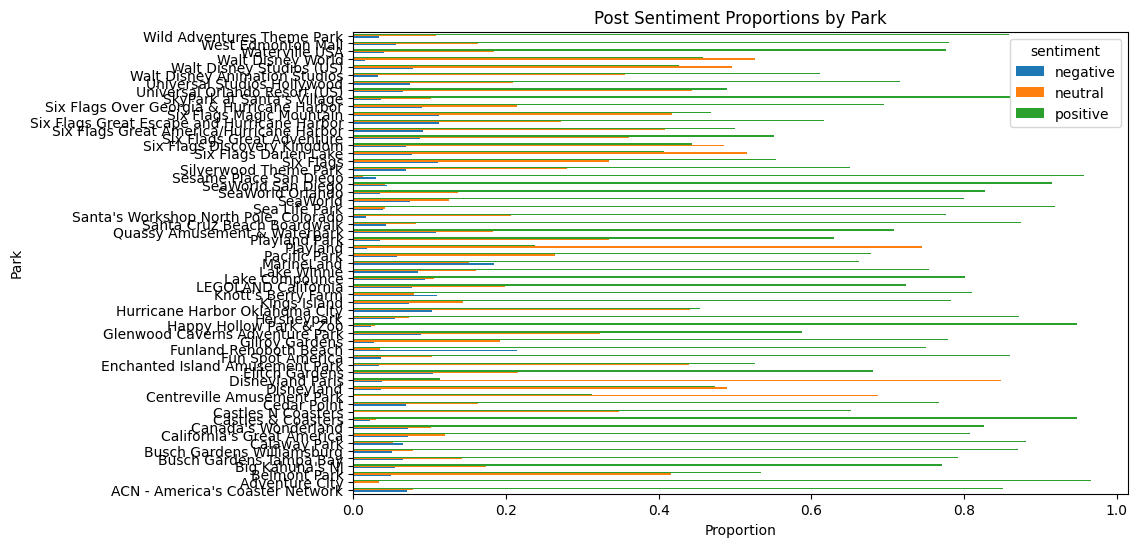

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

# Utility function definitions remain the same

def clean_post(text):
    """
    Utility function to clean post text by removing links, special characters
    using simple regex statements.
    """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

def get_post_sentiment(post):
    """
    Utility function to classify sentiment of passed post
    using textblob's sentiment method
    """
    analysis = TextBlob(clean_post(post))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text, re.I)
    if match:
        return True
    return False

# Assuming 'merged_df' is already loaded with Facebook data

# Add a column for sentiment analysis
merged_df['sentiment'] = merged_df['Message'].apply(lambda post: get_post_sentiment(post))

# Assuming parks are identified in the 'Profile' column now
# The previous step of determining the park from 'Message' is no longer needed
# Therefore, we remove the loop that applies word_in_text for each park

# Update to count posts by park using 'Profile' directly
tweets_by_park = {park: merged_df[merged_df['Profile'].str.contains(park, case=False)].shape[0] for park in parks}

# Sentiment analysis by park, using 'Profile' for park identification
sent_by_park = merged_df.groupby(['Profile', 'sentiment']).size().groupby(level=0).transform(lambda x: x/x.sum()).unstack()
sent_by_park.plot(kind='barh', figsize=(10, 6))  # Change to 'barh' for horizontal bars
plt.title('Post Sentiment Proportions by Park')
plt.xlabel('Proportion')  # Adjusted for horizontal orientation
plt.ylabel('Park')  # Adjusted for horizontal orientation
plt.show()



/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_70661/3986793807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Sentiment'])


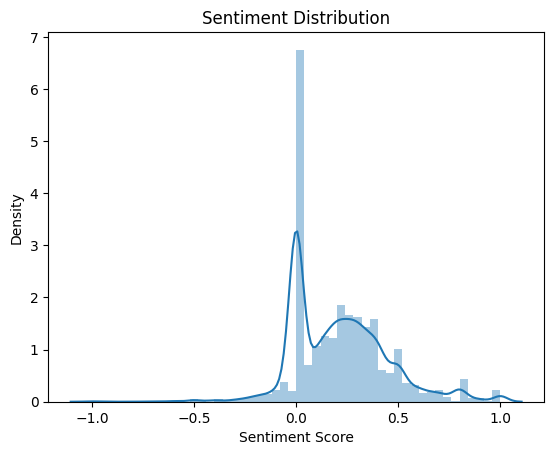

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For example, plotting the distribution of sentiment
sns.distplot(merged_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()
